# **Weisfeiler-Lehman Kernels**

Weisfeiler-Lehman Kernels are proposed in the paper [Weisfeiler Lehman Graph Kernels](https://www.jmlr.org/papers/volume12/shervashidze11a/shervashidze11a.pdf). Following note book has four sections



1.   Loading Graph Dataset 
2.   Weisfeiler-Lehman test for Isomorphism
3.   key insight: Weisfeiler-Lehman Kernel Framework

      *   Weisfeiler-Lehman Subtree Kernel 
      *   Weisfeiler-Lehman Edge Kernel
      *   Weisfeiler-Lehman Shortest Path Kernel
            

In [ ]:
#install python-igraph : we use IGraph for manipulating and storing graph data

!pip install python-igraph
!pip install cairocffi

In [ ]:
import os
import igraph as ig

In [ ]:
#mounting the data  on drive 

from google.colab import drive
drive.mount('/content/drive')
path = 'data/graph_data'

Mounted at /content/drive


In [ ]:
#retreving the file names
def get_data(path):
  graph_files = []
  for file in os.listdir(path):
    if file.endswith('gml'):
        graph_files.append(os.path.join(path,file))
  graph_files.sort()
  return graph_files
  

In [ ]:
def read_gml(filename):
  node_features = []
  g = ig.read(filename)
  if not 'label' in g.vs.attribute_names():
    g.vs['label'] = list(map(str,[l for l in g.vs.degree()]))
  node_features = g.vs['label']
  adj_mat  = np.asarray(g.get_adjacency().data)  
  return node_features,adj_mat

Graph G1



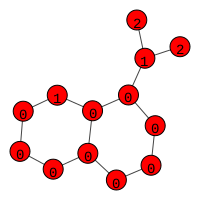

Graph G2



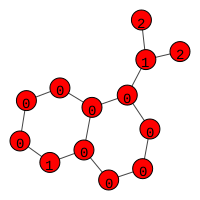

In [ ]:
#sample graph
from IPython.core.display import display, SVG

path = '/content/drive/MyDrive/data/graph_data/MUTAG'
graph_files = get_data(path)
G0 = ig.read(graph_files[1])
G1 = ig.read(graph_files[2])
print("Graph G1",end= "\n\n")
ig.plot(G0,bbox = (200, 200)).save('temporary.png') 
display(Image(filename='temporary.png'))
os.remove('temporary.png')
print("Graph G2",end="\n\n")
ig.plot(G1,bbox = (200, 200)).save('temporary.png')
display(Image(filename='temporary.png'))
os.remove('temporary.png')

## Checking for Isomoprhism of Graphs using 1D WL test 

In [ ]:
#does label compression 
def f(dict_labels,unique):


  new_labels = {}
  for s_v in unique_labels:

    if s_v in dict_labels.keys():
      new_labels.update({ s_v : dict_labels[s_v] })

    else :
      new_label  = str(len(dict_labels)+1)
      new_labels.update({ s_v  : new_label })    
      dict_labels.update({ s_v : new_label })

  return new_labels



In [ ]:
#does one iteration of WL test for Isomorphism 
def update_compressed_code(G,dict_global_labels):

  '''
      Parameters 
      G : Ipython Graph 
      global_labels : dictionary containing 

      Returns 

  '''

  
  multiset_g = list()
  for v in G.vs:

    multiset_v = list()
    #multiset-label determination
    for neigh in G.neighbors(v):
      multiset_v.append(G.vs[neigh]['label'])

    #sorting each multiset  
    multiset_v.sort() 
    multiset_v.insert(0,v['label'])
    multiset_g.append(multiset_v) 


  #getting unique multiset labels
  unique_multiset_g = list(set(map(tuple,multiset_g)))  #lists are not hashable so convert into tuples


  #label-compression and relabeling
  new_labels = f(dict_labels,unique_multiset_g)
  for v in G.vs:
    v['label'] = new_labels[v['labels']]




In [ ]:
#1d version of weisfeiler-lehman test for isomorphism 
def weisfeiler_lehman_test(G1,G2):

  '''
    Parameters 
      Gs : list of graphs

    Returns
      false  :  If G1,G2 are not isomorphic 
      None   :  inconclusive , G1,G2 could be isomophic or not  
  '''



  nv = G1.vcount()

  for i in range(nv):
    global_unique_dict = {}  #unique dict is used for each iteration
    update_compressed_code(G1,global_unique_dict)
    update_compressed_code(G2,global_unique_dict)




  for G in Gs:
    update_compressed_code(G)

  if (nv1 != nv2):
    return False

  for i in range(nv1):
    compressed_code1 = update_compressed_code(G1)   
    compressed_code2 = update_compressed_code(G2)

    if(compressed_code1 != compressed_code2):  return False

  return None

Example for testing isomorphism of graphs 

In [ ]:
#weisfeiler lehman subtree kernel
def weisfeiler_lehman_subtree_kernel():


In [ ]:

def weisfeiler_lehman_edge_kernel():
